## LIFE EXPECTANCY PREDICTION MODEL USING MACHINE LEARNING

### Author - Chandan D. Chaudhari
#### Github - https://github.com/chandanc5525
#### Dataset Link :- https://raw.githubusercontent.com/chandanc5525/LifeExpectancy_ModelPipeline/main/notebook/Data/LifeExpectancyData.csv

### 1. FEATURE INFORMATION 
1) Country
2) Year
3) Status – Developed or Developing status
4) Life expectancy – Life Expectancy in age
5) Adult Mortality – Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6) infant deaths – Number of Infant Deaths per 1000 population
7) Alcohol – Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8) percentage expenditure – Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9) Hepatitis B – Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10) Measles – Measles – number of reported cases per 1000 population
11) BMI – Average Body Mass Index of entire population
12) under-five deaths – Number of under-five deaths per 1000 population
13) Polio – Polio (Pol3) immunization coverage among 1-year-olds (%)
14) Total expenditure – General government expenditure on health as a percentage of total government expenditure (%)
15) Diphtheria – Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16) HIV/AIDS – Deaths per 1 000 live births HIV/AIDS (0-4 years)
17) GDP – Gross Domestic Product per capita (in USD)
18) Population – Population of the country
19) thinness 1-19 years – Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20) thinness 5-9 years – Prevalence of thinness among children for Age 5 to 9(%)
21) Income composition – Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22) Schooling – Number of years of Schooling(years)

### --- INSTALLING REQUIRED PACKAGES 

In [1]:
!pip install klib

Defaulting to user installation because normal site-packages is not writeable


### --- IMPORT PACKAGES

In [2]:
# Import Python Neccessories Libraries
import mlflow
import os
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
import math
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')
# Import EDA library
import klib

In [3]:
# Import Data using Pandas function

df = pd.read_csv(r'https://raw.githubusercontent.com/chandanc5525/LifeExpectancy_ModelPipeline/main/notebook/Data/LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [4]:
# Checking the total Rows and Columns in the Dataset

df.shape

(2938, 22)

In [5]:
# Listing the presented columns
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles ', 'BMI',
       'under-five deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income_Cresources', 'Schooling',
       'Life_expectancy'],
      dtype='object')

In [6]:
# Checking Missing Data Information
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Adult_Mortality            10
Infant_Deaths               0
Alcohol                   194
Percentage_Expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
under-five deaths           0
Polio                      19
Total_Expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
thinness  1-19 years       34
thinness 5-9 years         34
Income_Cresources         167
Schooling                 163
Life_expectancy            10
dtype: int64

## OBSERVATIONS 1

1. The Above Dataset Contains 2938 Rows and 22 Columns.
2. Out of 22 Columns, The LifeExpectancy Column acts as Target Column.
3. There are Total 133 Countries including Developed and Developing, and Few Feature Columns such as Percentage_Expenditure and Measles,Total Expenditure, Population and Schooling.
4. In Order to Evaluate Life Expectancy there are two possible ways:
      
      [a]. Simply drop all the rows  having null values in it, Since this dataset will be for 133 different countries w.r.t Years.
      
      [b]. We can go for Imputing Method so that Null values can be taken care.

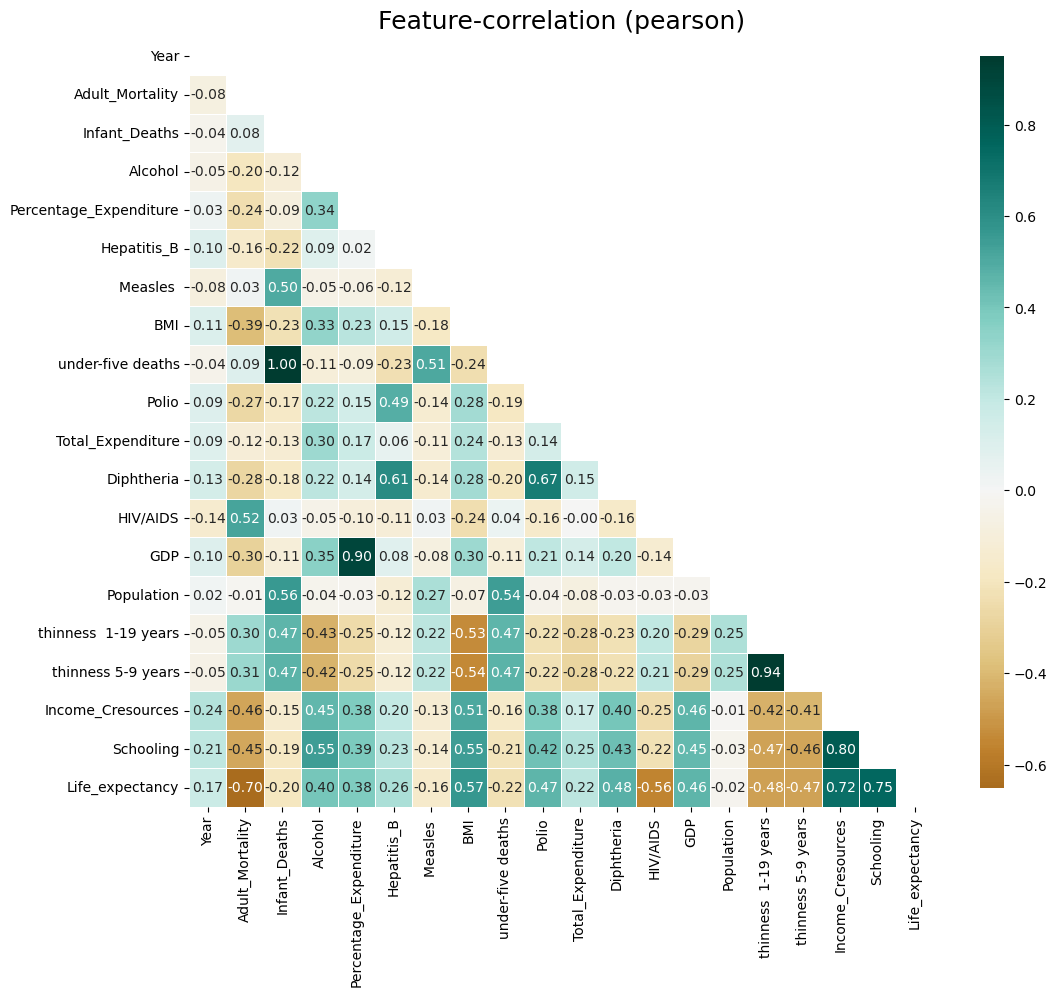

In [7]:
# Correlation Plot without Dropping Null Values
klib.corr_plot(df,annot=True);

In [8]:
# Dropping All Null Values in the Dataset
ndf = df.dropna()
ndf.shape

(1649, 22)

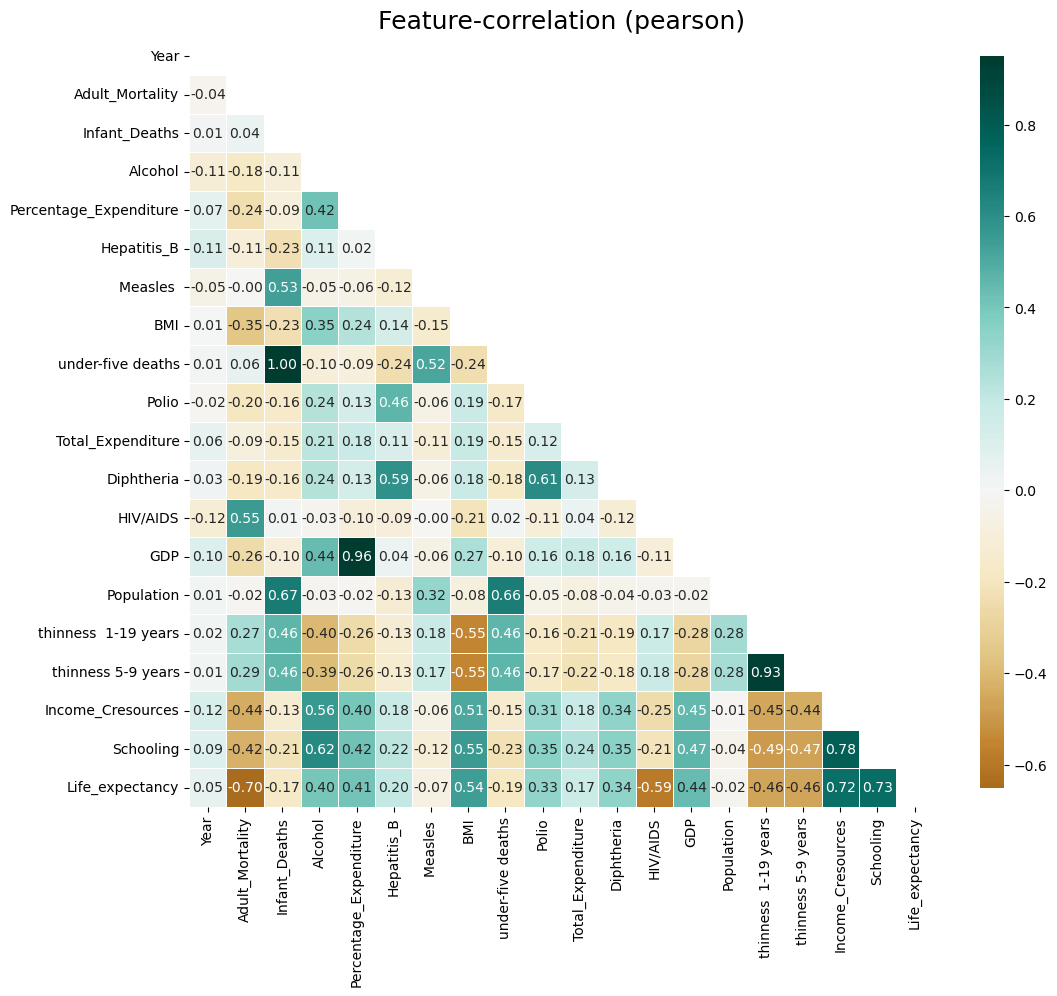

In [9]:
# Correlation Plot After Dropping Null Values
klib.corr_plot(ndf,annot=True);

## OBSERVATION 2

1. Life Expectancy is found to be Positively Correlated with Following Feature Columns such as -
   
   [a]. Schooling with 73%
    
    [b]. Income Composition Resources with 72%
    
    [c]. GDP with 44%
    
    [d]. BMI with 54%
    
    [e]. Percentage Expenditure and Alcohol with 40%
    
    [f]. Immunization we consider i.e.Hepetitis_B, Polio and Diphtheria having Positive Correlation with Life Expectancy
    
    



    
2. Life Expectancy is found to be Negatively Correlated with Following Feature Columns such as -

    [a]. Adult Mortality with 70%
    
    [b]. HIV/AIDS with 59%
    
    [c]. Thiness 1-19 Years and Thiness 5-9 Years with with 46%

### --- TASK 1 : Answers to All Questions Using EDA

### QUESTIONARIES:- 
1. Does various predicting factors which has been chosen initially really affect Life
expectancy? What are the predicting variables actually affecting life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare
expenditure in order to improve its average lifespan?
3. How do Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has a positive or negative correlation with eating habits,
lifestyle, exercise, smoking, drinking alcohol etc?
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have a positive or negative relationship with drinking
alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on Life Expectancy?

Q.] Does various predicting factors which has been chosen initially really affect Life
expectancy? What are the predicting variables actually affecting life expectancy?

In [10]:
# Evaluating Country Status, Having Life Expectancy Less Than 65 Years
ndf[ndf['Life_expectancy']<65]['Status'].value_counts()

Developing    439
Name: Status, dtype: int64

In [11]:
# # Evaluating Country Status, Having Life Expectancy Greater Than 65 Years
ndf[ndf['Life_expectancy']>65]['Status'].value_counts()

Developing    957
Developed     242
Name: Status, dtype: int64

In [12]:
# Evaluating Country Status, Having Life Expectancy Equal to 65 Years
ndf[ndf['Life_expectancy']==65]['Status'].value_counts()

Developing    11
Name: Status, dtype: int64

In [13]:
# Name of the Country Having Life Expectancy Less Than 65 Years
a = ndf[ndf['Life_expectancy']<65]['Country']
a.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Bhutan', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Papua New Guinea', 'Russian Federation', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa',
       'Swaziland', 'Tajikistan', 'Togo', 'Turkmenistan', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [14]:
# Taking Mean of Feature Columns
b = ndf[ndf['Life_expectancy']<65].mean()
b

Year                      2.007959e+03
Adult_Mortality           2.932005e+02
Infant_Deaths             5.905923e+01
Alcohol                   2.703007e+00
Percentage_Expenditure    9.658601e+01
Hepatitis_B               6.997950e+01
Measles                   2.824875e+03
BMI                       2.255626e+01
under-five deaths         8.657631e+01
Polio                     7.140547e+01
Total_Expenditure         5.730752e+00
Diphtheria                7.250797e+01
HIV/AIDS                  6.770387e+00
GDP                       1.017342e+03
Population                1.696464e+07
thinness  1-19 years      7.635763e+00
thinness 5-9 years        7.661048e+00
Income_Cresources         4.416446e-01
Schooling                 9.286788e+00
Life_expectancy           5.739408e+01
dtype: float64

## OBSERVATION 3

1. Developing Countries having Lower Life Expectancy i.e. Less than 65.
2. Income Composition Resources for such countries found to be very poor and also if we compare Total Expenditure for such countries are very less than Percentage Expanditure, Meaning Goverment has to focus more Expenditure in order to improve life expectancy.
3. BMI value is also found to be in Normal range i.e Between 18.5 to 24.5.

Q.] How do Infant and Adult mortality rates affect life expectancy?

In [15]:
# Dataset for Developed Countries
developed_country_data = ndf[ndf['Status']=='Developed']
developed_country_data.drop(['Year','Country'],axis=1,inplace=True)
developed_country_data

,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
113,Developed,6.0,1,9.71,10769.363050,91.0,340,66.1,1,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4,82.7
114,Developed,61.0,1,9.87,11734.853810,91.0,158,65.5,1,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3,82.5
115,Developed,61.0,1,10.03,11714.998580,91.0,199,65.0,1,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1,82.3
116,Developed,63.0,1,10.30,10986.265270,92.0,190,64.4,1,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8,82.0
117,Developed,64.0,1,10.52,8875.786493,92.0,70,63.9,1,92.0,9.20,92.0,0.1,51874.84800,223175.0,0.7,0.6,0.927,19.5,81.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Developed,86.0,2,11.12,1934.398154,77.0,152,57.6,2,95.0,7.21,95.0,0.1,14676.76900,4567864.0,0.6,0.5,0.820,15.7,79.1
2506,Developed,54.0,0,7.30,1142.212403,67.0,26,59.0,0,98.0,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8,82.3
2507,Developed,57.0,0,7.30,1212.666327,67.0,51,58.5,0,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8,81.9
2508,Developed,57.0,0,7.40,10947.023270,53.0,30,58.1,0,98.0,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8,81.7


In [16]:
# Dataset for Developed Countries
developing_country_data = ndf[ndf['Status']=='Developing']
developing_country_data.drop(['Year','Country'],axis=1,inplace=True)
developing_country_data

,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [17]:
# Checking Mean of Developend Countries Dataset
developed_country_data.mean()

Adult_Mortality           8.419008e+01
Infant_Deaths             8.719008e-01
Alcohol                   1.043620e+01
Percentage_Expenditure    2.656822e+03
Hepatitis_B               8.788017e+01
Measles                   4.749339e+02
BMI                       5.233678e+01
under-five deaths         1.086777e+00
Polio                     9.449174e+01
Total_Expenditure         7.023099e+00
Diphtheria                9.464463e+01
HIV/AIDS                  1.000000e-01
GDP                       1.897693e+04
Population                8.744688e+06
thinness  1-19 years      1.435950e+00
thinness 5-9 years        1.460744e+00
Income_Cresources         8.361612e-01
Schooling                 1.557355e+01
Life_expectancy           7.869174e+01
dtype: float64

In [18]:
# Checking Mean of Developing Countries Dataset
developing_country_data.mean()

Adult_Mortality           1.826674e+02
Infant_Deaths             3.800213e+01
Alcohol                   3.517896e+00
Percentage_Expenditure    3.622293e+02
Hepatitis_B               7.772779e+01
Measles                   2.525414e+03
BMI                       3.568486e+01
under-five deaths         5.163895e+01
Polio                     8.168515e+01
Total_Expenditure         5.772374e+00
Diphtheria                8.235110e+01
HIV/AIDS                  2.307889e+00
GDP                       3.259395e+03
Population                1.566995e+07
thinness  1-19 years      5.437953e+00
thinness 5-9 years        5.500640e+00
Income_Cresources         5.963589e-01
Schooling                 1.152587e+01
Life_expectancy           6.768735e+01
dtype: float64

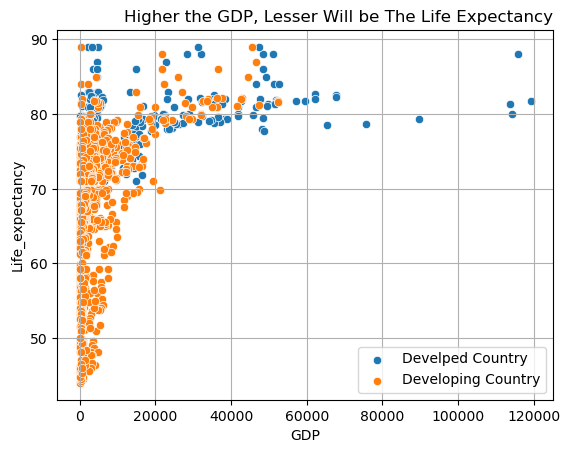

In [19]:
sns.scatterplot(x= developed_country_data.GDP,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.GDP,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Higher the GDP, Lesser Will be The Life Expectancy',loc='right')
plt.grid()
plt.show()

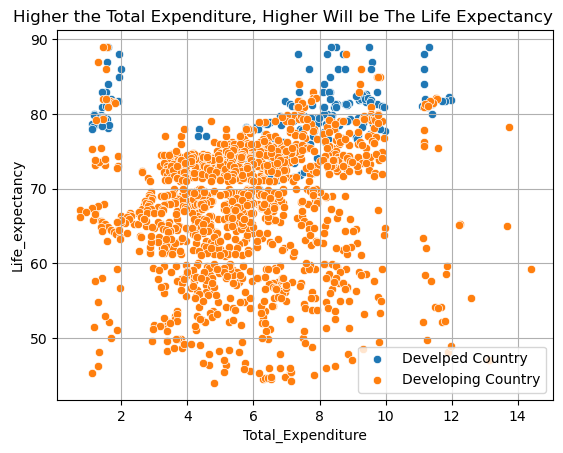

In [20]:
sns.scatterplot(x= developed_country_data.Total_Expenditure,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Total_Expenditure,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Higher the Total Expenditure, Higher Will be The Life Expectancy',loc='right')
plt.grid()
plt.show()

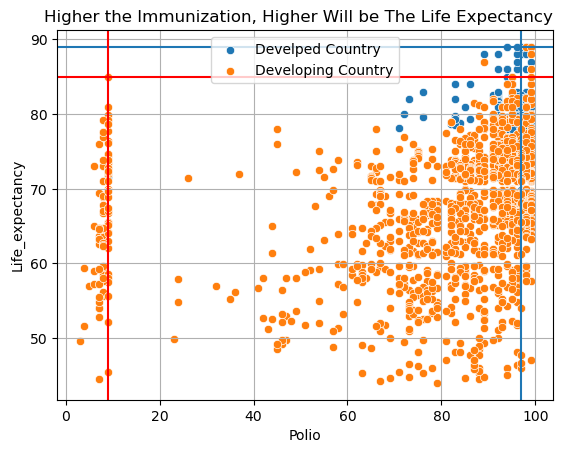

In [21]:
sns.scatterplot(x= developed_country_data.Polio,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Polio,y= developing_country_data.Life_expectancy)
plt.axhline(89)
plt.axvline(97)
plt.axhline(85,color ='r')
plt.axvline(9,color = 'r')
plt.title('Higher the Immunization, Higher Will be The Life Expectancy',loc='right')
plt.grid()
plt.legend(['Develped Country','Developing Country'],)
plt.show()

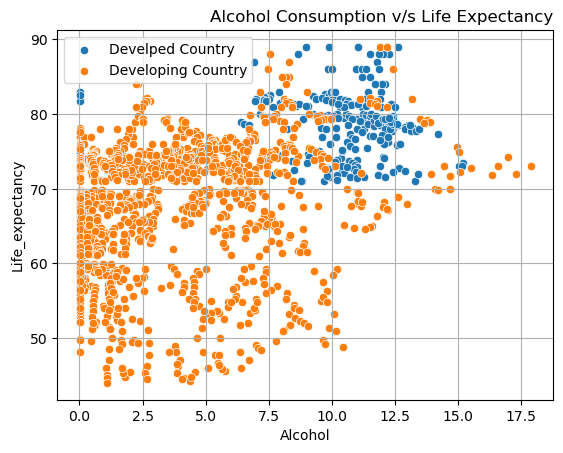

In [22]:
sns.scatterplot(x= developed_country_data.Alcohol,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Alcohol,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Alcohol Consumption v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

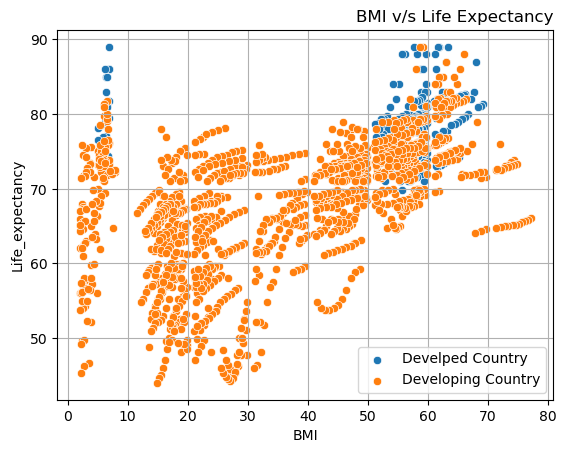

In [23]:
sns.scatterplot(x= developed_country_data.BMI,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.BMI,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('BMI v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

## OBSERVATION 4

1. Infant and Adult Mortality Rate found to be very poor for Developing Countries as Compared with Developed Countries. 

2. There are Plenty of reason for the same few reasons are listed below - High GDP, Lesser Total Expenditure, Comparatively Less immunization for Developing Countries 

3. Intresting Fact is Alcohol Consumption found to be very high for Developing Countries

Q.] Does Life Expectancy has a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?

## OBSERVATION 5

From Above Data, We Found that the Value of BMI is Good for Developed Countries in comparison with Developing Country.

As Already Mentioned, The Alcohol Consumption is very high for Developing Countries.

Life Expectancy is found to be Positively Correlated with Following Feature Columns such as -

[a]. Income Composition Resources with 72%

[b]. BMI with 54%

[c]. Percentage Expenditure and Alcohol with 40%

Q.] What is the impact of schooling on the lifespan of humans?

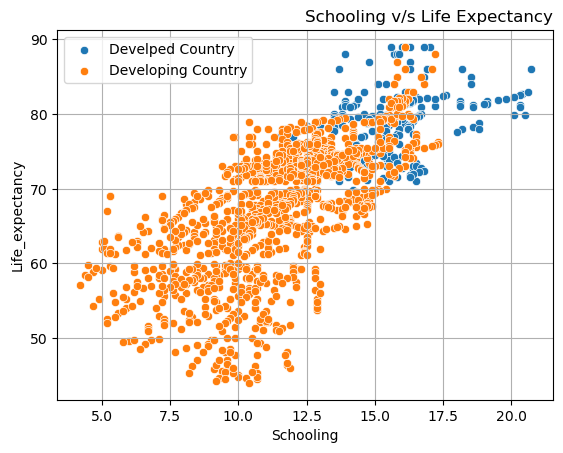

In [24]:
sns.scatterplot(x= developed_country_data.Schooling,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Schooling,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Schooling v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

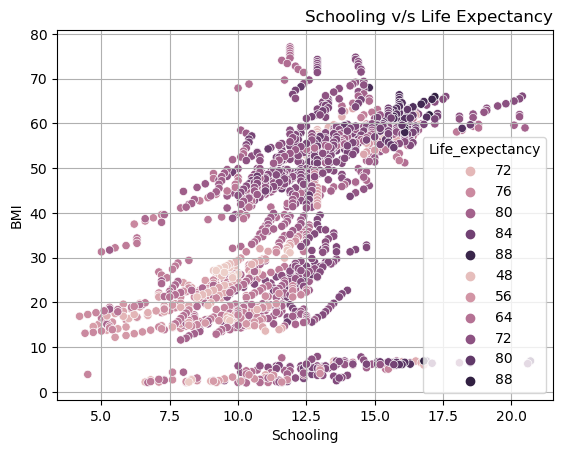

In [25]:
sns.scatterplot(x= developed_country_data.Schooling,y= developed_country_data.BMI,hue= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Schooling,y= developing_country_data.BMI,hue= developing_country_data.Life_expectancy)
#plt.legend(['Develped Country','Developing Country'])
plt.title('Schooling v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

## OBSERVATION 6

Schooling – Number of years of Schooling (years)

1. Schooling has positive correlation w.r.t Life Expectancy i.e. 73%

2. For Developed Countries - Schooling found to be very higher compared with Developing Countries.

3. Schooling also further related with Life style and Health Conciousness and Eating Habbits. This might be the reason for higher life expectancy found for developed countries than developing countries

Q.] Does Life Expectancy have a positive or negative relationship with drinking alcohol?

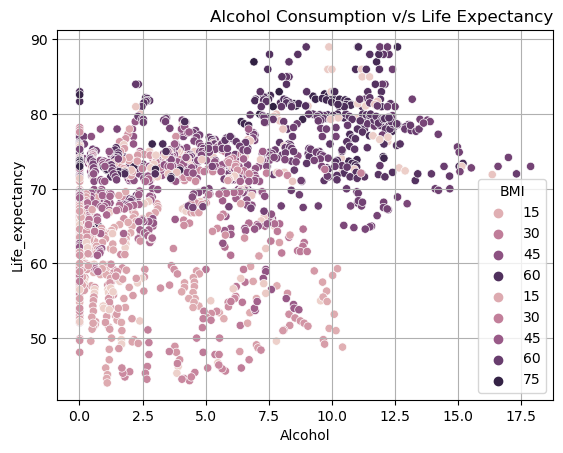

In [26]:
sns.scatterplot(x= developed_country_data.Alcohol,y= developed_country_data.Life_expectancy,hue= developed_country_data.BMI)
sns.scatterplot(x= developing_country_data.Alcohol,y= developing_country_data.Life_expectancy,hue= developing_country_data.BMI)
plt.title('Alcohol Consumption v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

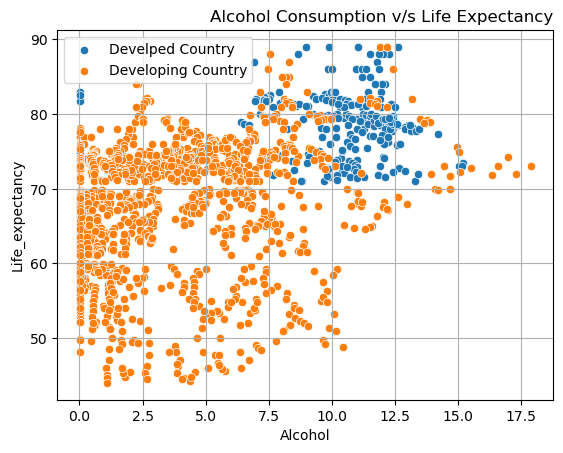

In [27]:
sns.scatterplot(x= developed_country_data.Alcohol,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Alcohol,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Alcohol Consumption v/s Life Expectancy',loc='right')
plt.grid()
plt.show()

## OBSERVATION 7

Life Expectancy found to be Positively correlated with Alcohol i.e. 40%

Q.] Do densely populated countries tend to have lower life expectancy?

In [28]:
# Checking Maximum Population Country
ndf['Population'].max()

1293859294.0

In [29]:
# Checking Minimum Population Country
ndf['Population'].min()

34.0

In [30]:
# Average Population Country
ndf['Population'].mean()

14653625.889484538

In [31]:
# Dense Populated Country
ndf[ndf['Population']==1293859294.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1187,India,2014,Developing,184.0,957,3.07,86.521539,79.0,79563,18.1,...,4.69,85.0,0.2,1573.11889,1.293859e+09,26.8,27.4,0.607,11.6,68.0


In [32]:
# Low populated Country
ndf[ndf['Population']==34]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1614,Maldives,2003,Developing,112.0,0,1.75,491.497891,98.0,75,16.7,...,5.9,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8,72.7


In [33]:
# More populated Countries i.e Population higher than Mean
ndf[ndf['Population']>14653625.889484538]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
8,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,57.5
11,Afghanistan,2004,Developing,293.0,87,0.02,15.296066,67.0,466,13.8,...,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,57.0
13,Afghanistan,2002,Developing,3.0,88,0.01,16.887351,64.0,2486,13.0,...,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,56.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Ukraine,2014,Developing,23.0,4,8.06,5.663849,22.0,0,6.7,...,7.10,23.0,0.2,314.658296,45271947.0,2.3,2.4,0.746,15.2,78.0
2744,Ukraine,2001,Developing,253.0,6,4.31,8.897421,7.0,16970,55.1,...,5.66,99.0,0.8,78.738243,48683865.0,2.9,3.0,0.673,13.2,67.7
2745,Ukraine,2000,Developing,257.0,6,4.49,7.883791,4.0,817,54.8,...,5.59,99.0,0.7,635.789635,49175848.0,3.0,3.1,0.669,13.3,67.5
2909,Zambia,2012,Developing,349.0,29,2.59,196.915250,78.0,896,21.7,...,4.91,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3,59.2


In [34]:
# More populated Countries i.e Population higher than Mean
ndf[ndf['Population']>14653625.889484538]['Country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Bangladesh', 'Brazil', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'Colombia', 'Ecuador', 'Ethiopia', 'France',
       'Germany', 'Ghana', 'Guatemala', 'India', 'Indonesia', 'Iraq',
       'Italy', 'Kazakhstan', 'Kenya', 'Madagascar', 'Malawi', 'Malaysia',
       'Mali', 'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal',
       'Netherlands', 'Niger', 'Nigeria', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Syrian Arab Republic', 'Thailand',
       'Turkey', 'Uganda', 'Ukraine', 'Zambia', 'Zimbabwe'], dtype=object)

In [35]:
# More populated Countries i.e Population Lower than Mean
ndf[ndf['Population']<14653625.889484538]['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

Q.] Do densely populated countries tend to have lower life expectancy?

In [36]:
# Dense Populated Country
ndf[ndf['Population']==1293859294.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1187,India,2014,Developing,184.0,957,3.07,86.521539,79.0,79563,18.1,...,4.69,85.0,0.2,1573.11889,1.293859e+09,26.8,27.4,0.607,11.6,68.0


In [37]:
# Dense Populated Country Year Wise
ndf[ndf['Year']==2000]['Population'].max()

175287587.0

In [38]:
# Dense Populated Country in Year 2000
ndf[ndf['Population']==175287587.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
367,Brazil,2000,Developing,183.0,111,7.26,179.477729,94.0,36,43.7,...,7.3,98.0,0.1,3739.11936,175287587.0,3.4,3.4,0.677,14.1,75.0


In [39]:
# Dense Populated Country Year Wise
ndf[ndf['Year']==2005]['Population'].max()

1144118674.0

In [40]:
# Dense Populated Country in Year 2005
ndf[ndf['Population']==1144118674.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1196,India,2005,Developing,211.0,1500,1.27,3.509637,8.0,36711,13.5,...,4.28,65.0,0.3,77.819,1.144119e+09,27.2,28.1,0.526,9.4,64.4


In [41]:
# Dense Populated Country Year Wise
ndf[ndf['Year']==2010]['Population'].max()

242524123.0

In [42]:
# Dense Populated Country in Year 2010
ndf[ndf['Population']==242524123.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1207,Indonesia,2010,Developing,187.0,138,0.08,190.545365,83.0,18869,22.9,...,2.74,81.0,0.3,3113.48635,242524123.0,1.6,1.5,0.656,12.1,68.1


In [43]:
# Dense Populated Country Year Wise
ndf[ndf['Year']==2015]['Population'].max()

33736494.0

In [44]:
# Dense Populated Country in Year 2010
ndf[ndf['Population']==33736494.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0


## OBSERVATION 8

1. Based on Above Observation we find, Average Life Expectancy for Dense Populated Country is 65 to 69 Years.
2. To understand the trend pattern, we have segregated dataset into %years of span length i.e. Year 2000,2005,2010,2015. Intresting Insigh is highlighted through snippet codes.
3. In Year 2000 - Brazil is found to be Mostly Popultaed Country with Avg Life Expectancy of 75 Years.
   
   In Year 2005 - India is found to be Mostly Popultaed Country with Avg Life Expectancy of 64.4 Years.
   
   In Year 2010 - Indonesia is found to be Mostly Popultaed Country with Avg Life Expectancy of 68.1 Years.
   
   In Year 2015 - Afghanistan is found to be Mostly Popultaed Country with Avg Life Expectancy of 65 Years.
   
4. All Dense Populated Countries are Developing Countries Only

Q.] What is the impact of Immunization coverage on Life Expectancy?

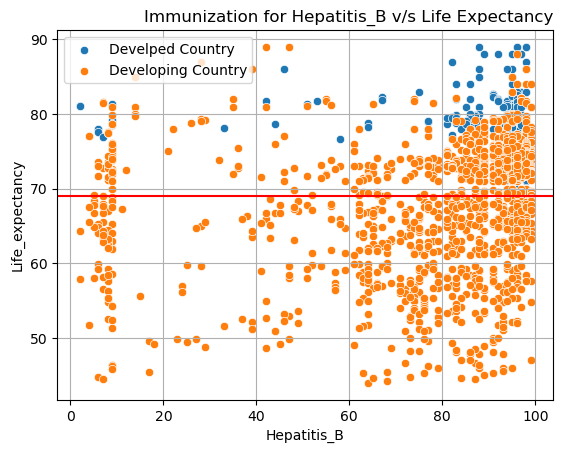

In [45]:
sns.scatterplot(x= developed_country_data.Hepatitis_B,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Hepatitis_B,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Immunization for Hepatitis_B v/s Life Expectancy',loc='right')
plt.axhline(69,color ='r')
plt.grid()
plt.show()

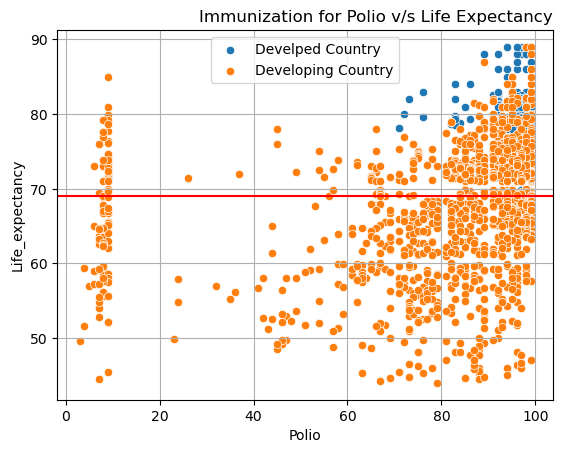

In [46]:
sns.scatterplot(x= developed_country_data.Polio,y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data.Polio,y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Immunization for Polio v/s Life Expectancy',loc='right')
plt.axhline(69,color ='r')
plt.grid()
plt.show()

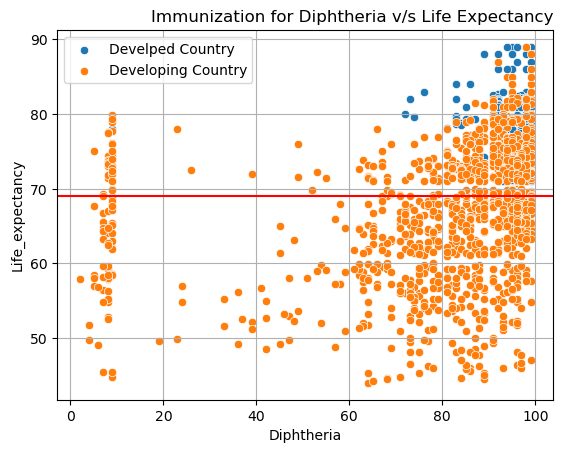

In [47]:
sns.scatterplot(x= developed_country_data['Diphtheria'],y= developed_country_data.Life_expectancy)
sns.scatterplot(x= developing_country_data['Diphtheria'],y= developing_country_data.Life_expectancy)
plt.legend(['Develped Country','Developing Country'])
plt.title('Immunization for Diphtheria v/s Life Expectancy',loc='right')
plt.axhline(69,color ='r')
plt.grid()
plt.show()

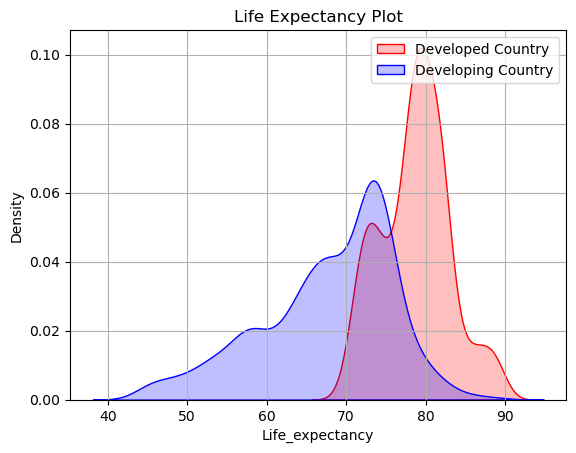

In [48]:
# Life Expectancy for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Life_expectancy,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Life_expectancy,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy Plot')
plt.grid()

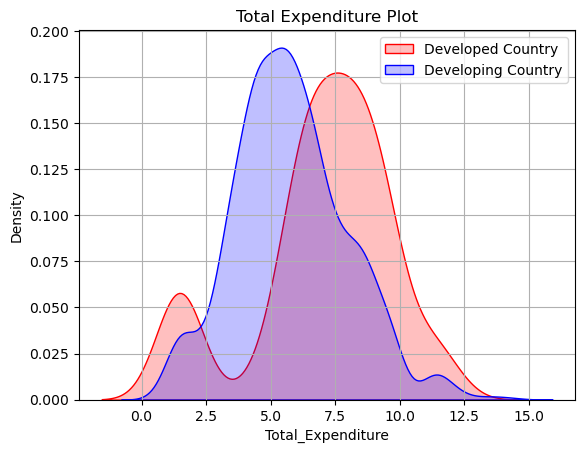

In [49]:
# Total Expenditure Consumption for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Total_Expenditure,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Total_Expenditure,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Total Expenditure Plot')
plt.grid()

### OBSERVATION 9

1. Higher the Immunization Higher will be the Life Expectancy.
2. From Above EDA, As Immunization Increases The Life Expectancy found to be increased mor than Avg Life Expectancy Level i.e. More than 69 Years
3. Total Expenditure plays an vital role in order to predict Life Expectancy. Since From Above Graph we can observed that higher the government expenditure on health care more will be Life Expectancy Rate for Developed Countries 

### --- TASK 2 : MACHINE LEARNING MODEL BUILDING

In [50]:
data = ndf.drop(['Country','Year'],axis=1)
data

,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [51]:
data['Status'] = data['Status'].map({'Developing': 1, 'Developed': 0})

In [52]:
data.head()

,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [53]:
features = data.columns
features = ['Status','Adult_Mortality', 'Infant_Deaths', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis_B', 'Measles ', 'BMI',
       'under-five deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income_Cresources', 'Schooling',
       'Life_expectancy']

In [54]:
list(enumerate(features))

[(0, 'Status'),
 (1, 'Adult_Mortality'),
 (2, 'Infant_Deaths'),
 (3, 'Alcohol'),
 (4, 'Percentage_Expenditure'),
 (5, 'Hepatitis_B'),
 (6, 'Measles '),
 (7, 'BMI'),
 (8, 'under-five deaths'),
 (9, 'Polio'),
 (10, 'Total_Expenditure'),
 (11, 'Diphtheria'),
 (12, 'HIV/AIDS'),
 (13, 'GDP'),
 (14, 'Population'),
 (15, 'thinness  1-19 years'),
 (16, 'thinness 5-9 years'),
 (17, 'Income_Cresources'),
 (18, 'Schooling'),
 (19, 'Life_expectancy')]

### BOX PLOT BEFORE TREATING OUTLIERS

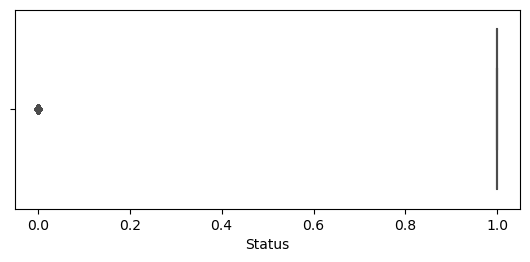

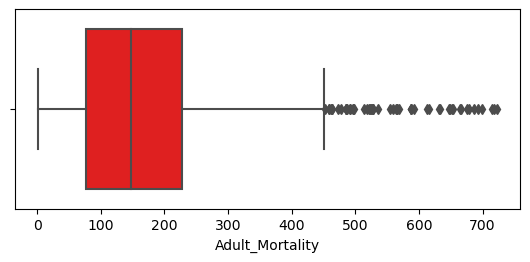

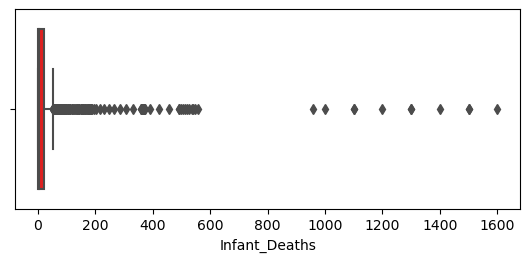

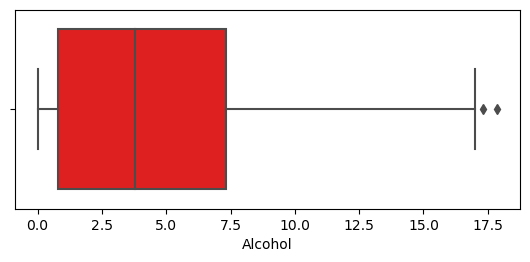

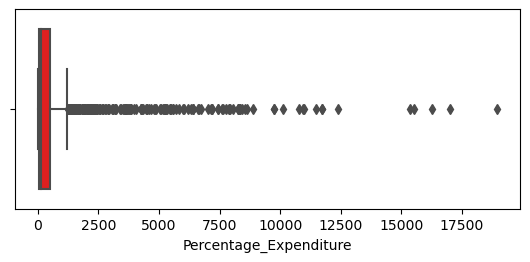

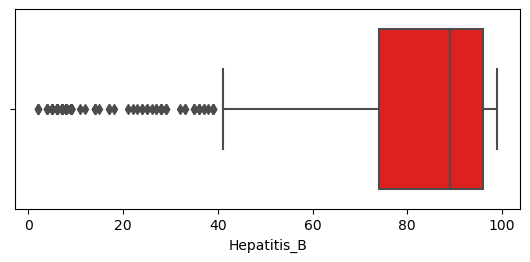

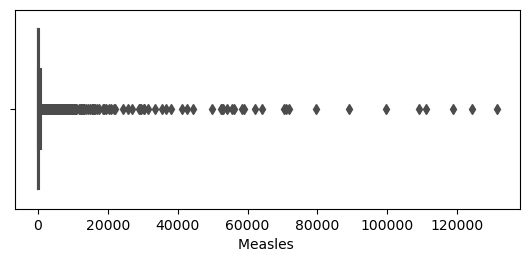

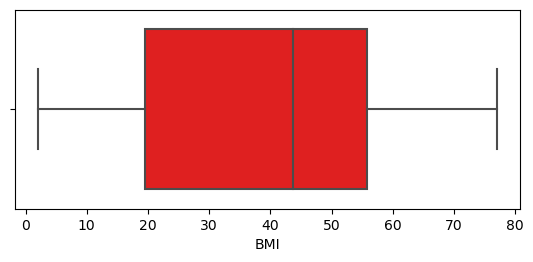

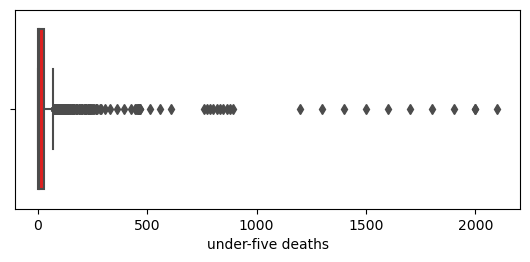

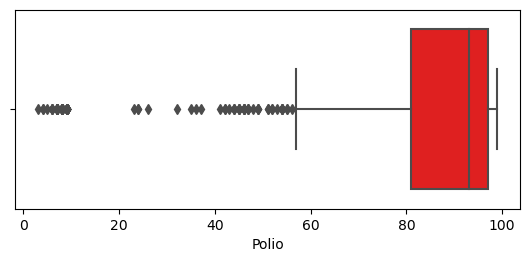

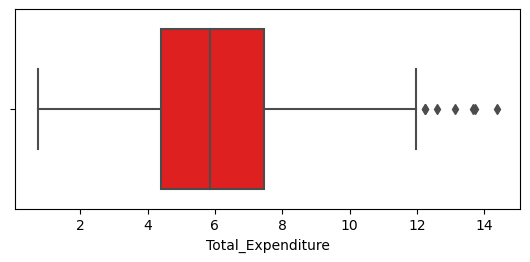

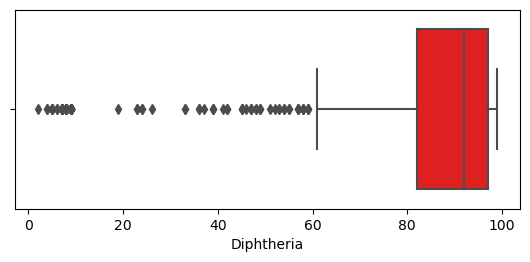

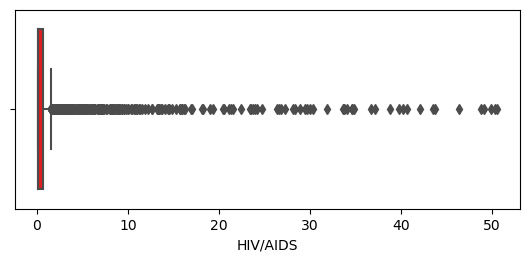

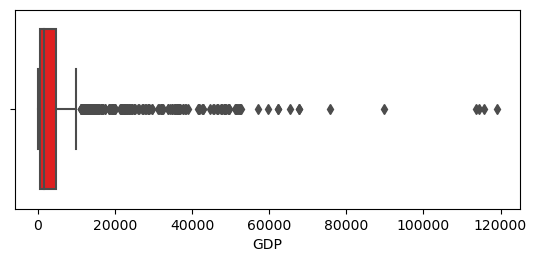

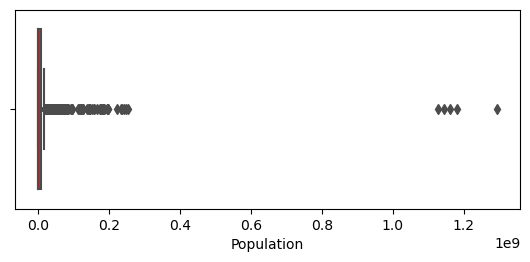

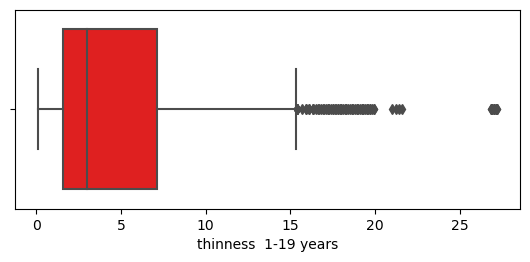

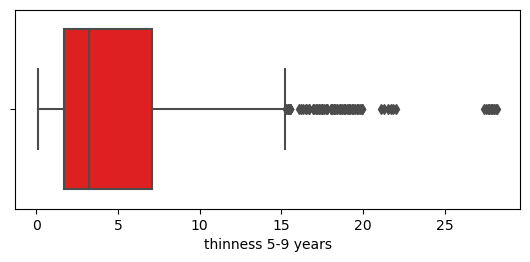

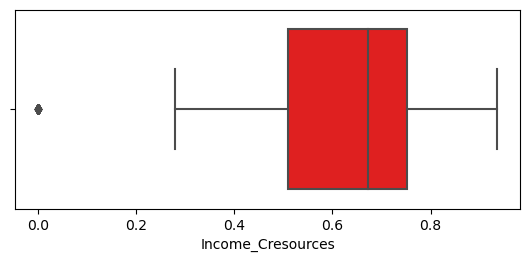

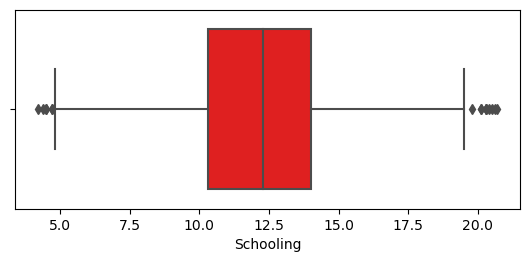

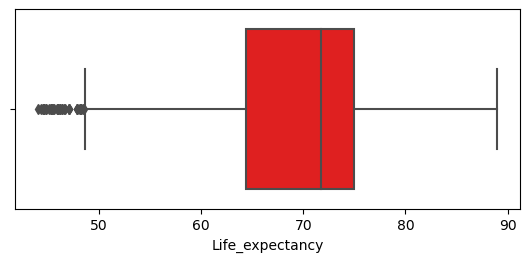

In [55]:
# Checking Outlier In The Datset
for col in enumerate(features):
    plt.figure(figsize=(30,15))
    plt.subplot(5,4,col[0]+1)
    sns.boxplot(x = col[1],color='red',data=data)
    plt.show()

From Above Observation.....
1. All Most All The Features Contains Outliers, Except Few Feature Columns such as BMI,IncomeCResource. 

### TREATING OUTLIERS

In [56]:
IQR = data['Life_expectancy'].quantile(0.75) - data['Life_expectancy'].quantile(0.25)

lower = data['Life_expectancy'].quantile(0.25) - 1.5* IQR
upper = data['Life_expectancy'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Life_expectancy']>upper,True, np.where(data['Life_expectancy']<lower,True,False))

data = data.loc[~(outliers)]

In [57]:
IQR = data['Schooling'].quantile(0.75) - data['Schooling'].quantile(0.25)

lower = data['Schooling'].quantile(0.25) - 1.5* IQR
upper = data['Schooling'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Schooling']>upper,True, np.where(data['Schooling']<lower,True,False))

data = data.loc[~(outliers)]

In [58]:
IQR = data['thinness 5-9 years'].quantile(0.75) - data['thinness 5-9 years'].quantile(0.25)

lower = data['thinness 5-9 years'].quantile(0.25) - 1.5* IQR
upper = data['thinness 5-9 years'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['thinness 5-9 years']>upper,True, np.where(data['thinness 5-9 years']<lower,True,False))

data = data.loc[~(outliers)]

In [59]:
IQR = data['Population'].quantile(0.75) - data['Population'].quantile(0.25)

lower = data['Population'].quantile(0.25) - 1.5* IQR
upper = data['Population'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Population']>upper,True, np.where(data['Population']<lower,True,False))

data = data.loc[~(outliers)]

In [60]:
IQR = data['GDP'].quantile(0.75) - data['GDP'].quantile(0.25)

lower = data['GDP'].quantile(0.25) - 1.5* IQR
upper = data['GDP'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['GDP']>upper,True, np.where(data['GDP']<lower,True,False))

data = data.loc[~(outliers)]

In [61]:
IQR = data['HIV/AIDS'].quantile(0.75) - data['HIV/AIDS'].quantile(0.25)

lower = data['HIV/AIDS'].quantile(0.25) - 1.5* IQR
upper = data['HIV/AIDS'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['HIV/AIDS']>upper,True, np.where(data['HIV/AIDS']<lower,True,False))

data = data.loc[~(outliers)]

In [62]:
IQR = data['Diphtheria'].quantile(0.75) - data['Diphtheria'].quantile(0.25)

lower = data['Diphtheria'].quantile(0.25) - 1.5* IQR
upper = data['Diphtheria'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Diphtheria']>upper,True, np.where(data['Diphtheria']<lower,True,False))

data = data.loc[~(outliers)]

In [63]:
IQR = data['Total_Expenditure'].quantile(0.75) - data['Total_Expenditure'].quantile(0.25)

lower = data['Total_Expenditure'].quantile(0.25) - 1.5* IQR
upper = data['Total_Expenditure'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Total_Expenditure']>upper,True, np.where(data['Total_Expenditure']<lower,True,False))

data = data.loc[~(outliers)]

In [64]:
IQR = data['Polio'].quantile(0.75) - data['Polio'].quantile(0.25)

lower = data['Polio'].quantile(0.25) - 1.5* IQR
upper = data['Polio'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Polio']>upper,True, np.where(data['Polio']<lower,True,False))

data = data.loc[~(outliers)]

In [65]:
IQR = data['under-five deaths'].quantile(0.75) - data['under-five deaths'].quantile(0.25)

lower = data['under-five deaths'].quantile(0.25) - 1.5* IQR
upper = data['under-five deaths'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['under-five deaths']>upper,True, np.where(data['under-five deaths']<lower,True,False))

data = data.loc[~(outliers)]

In [66]:
IQR = data['Measles '].quantile(0.75) - data['Measles '].quantile(0.25)

lower = data['Measles '].quantile(0.25) - 1.5* IQR
upper = data['Measles '].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Measles ']>upper,True, np.where(data['Measles ']<lower,True,False))

data = data.loc[~(outliers)]

In [67]:
IQR = data['Hepatitis_B'].quantile(0.75) - data['Hepatitis_B'].quantile(0.25)

lower = data['Hepatitis_B'].quantile(0.25) - 1.5* IQR
upper = data['Hepatitis_B'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Hepatitis_B']>upper,True, np.where(data['Hepatitis_B']<lower,True,False))

data = data.loc[~(outliers)]

In [68]:
IQR = data['Percentage_Expenditure'].quantile(0.75) - data['Percentage_Expenditure'].quantile(0.25)

lower = data['Percentage_Expenditure'].quantile(0.25) - 1.5* IQR
upper = data['Percentage_Expenditure'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Percentage_Expenditure']>upper,True, np.where(data['Percentage_Expenditure']<lower,True,False))

data = data.loc[~(outliers)]

In [69]:
IQR = data['Alcohol'].quantile(0.75) - data['Alcohol'].quantile(0.25)

lower = data['Alcohol'].quantile(0.25) - 1.5* IQR
upper = data['Alcohol'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Alcohol']>upper,True, np.where(data['Alcohol']<lower,True,False))

data = data.loc[~(outliers)]

In [70]:
IQR = data['Infant_Deaths'].quantile(0.75) - data['Infant_Deaths'].quantile(0.25)

lower = data['Infant_Deaths'].quantile(0.25) - 1.5* IQR
upper = data['Infant_Deaths'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Infant_Deaths']>upper,True, np.where(data['Infant_Deaths']<lower,True,False))

data = data.loc[~(outliers)]

In [71]:
IQR = data['Adult_Mortality'].quantile(0.75) - data['Adult_Mortality'].quantile(0.25)

lower = data['Adult_Mortality'].quantile(0.25) - 1.5* IQR
upper = data['Adult_Mortality'].quantile(0.75) + 1.5* IQR

outliers = np.where(data['Adult_Mortality']>upper,True, np.where(data['Adult_Mortality']<lower,True,False))

data = data.loc[~(outliers)]

### BOX PLOT AFTER TREATING OUTLIERS

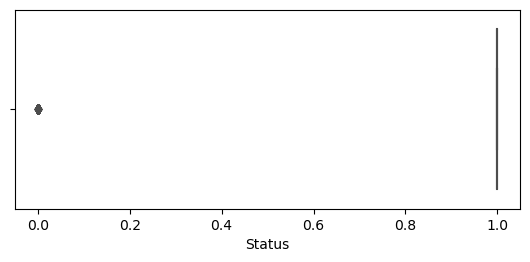

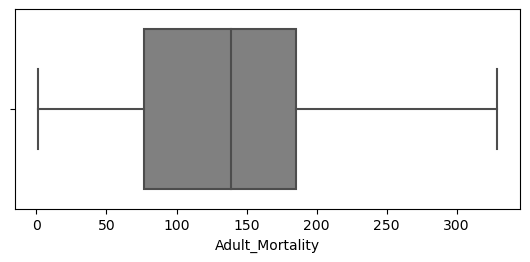

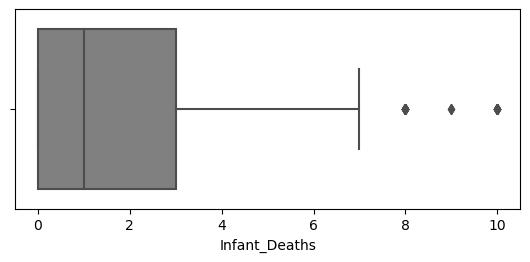

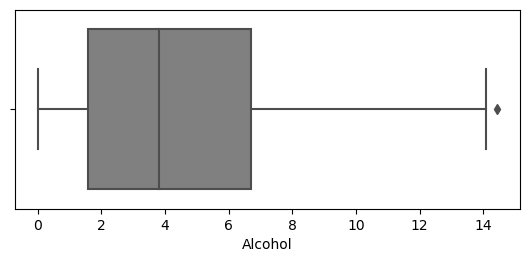

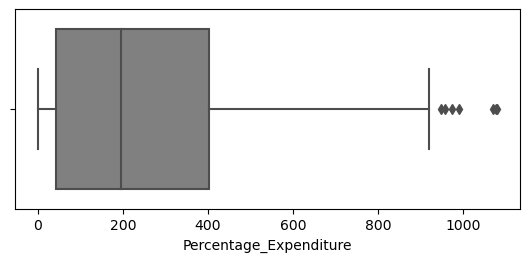

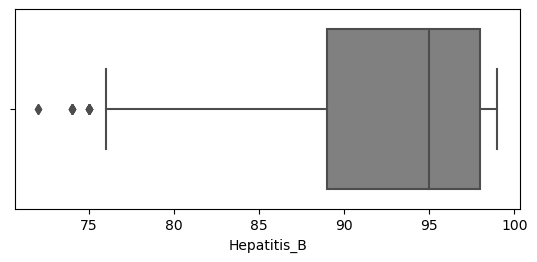

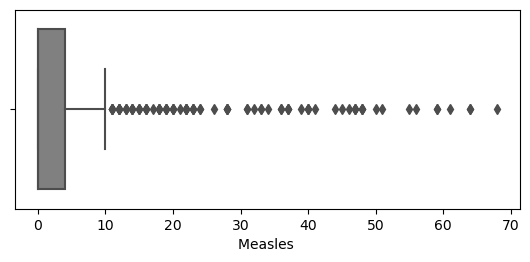

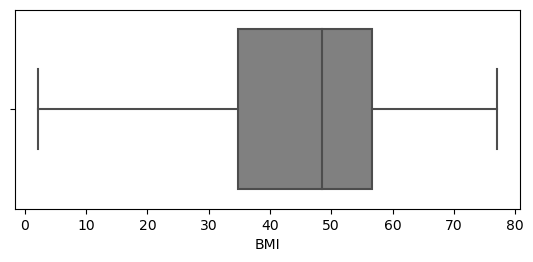

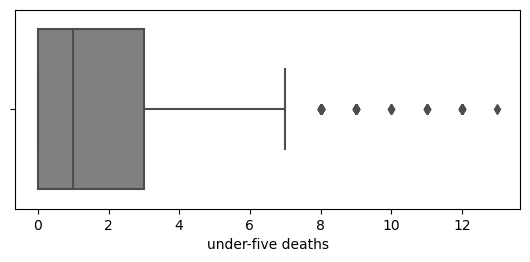

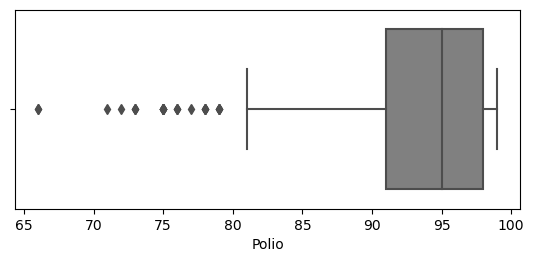

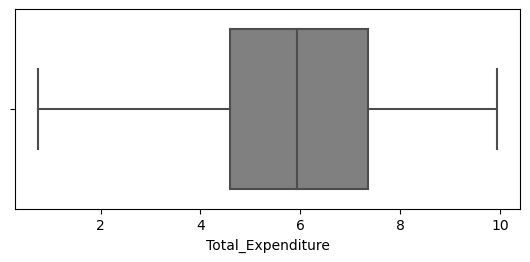

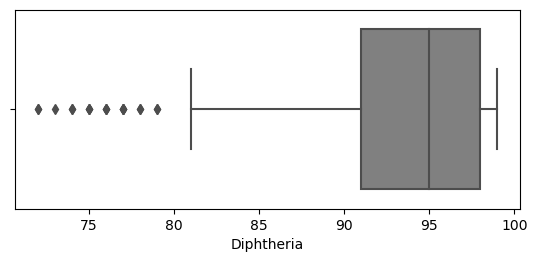

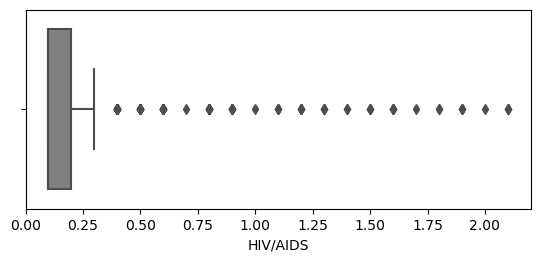

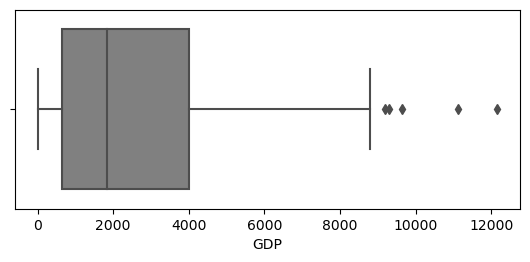

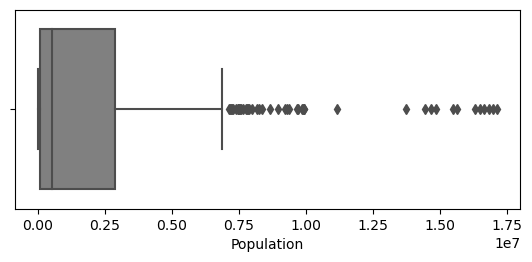

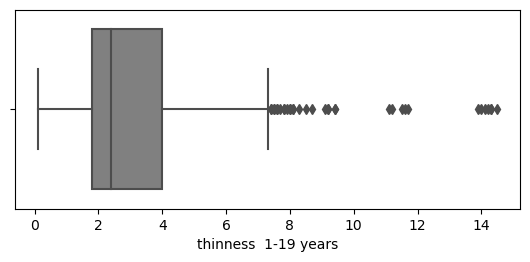

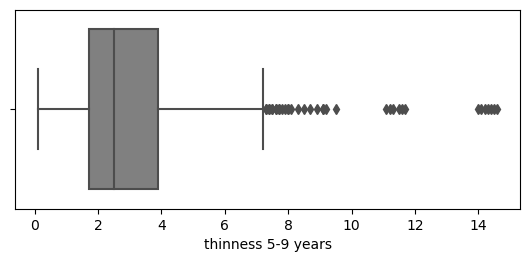

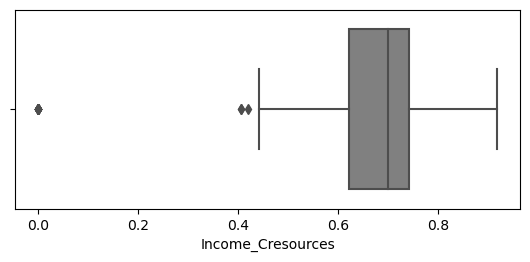

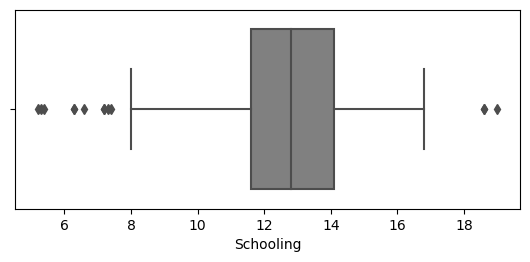

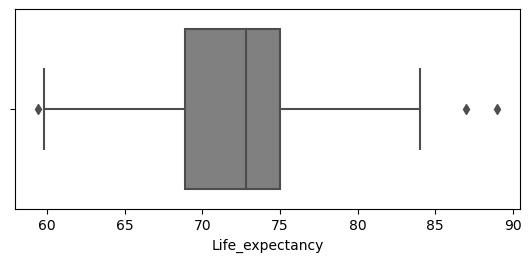

In [72]:
# Checking Outlier In The Datset
for col in enumerate(features):
    plt.figure(figsize=(30,15))
    plt.subplot(5,4,col[0]+1)
    sns.boxplot(x = col[1],color='gray',data=data)
    plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split Data set into Independent Features and Dependent Feature

X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
!pip install XGBoost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

Defaulting to user installation because normal site-packages is not writeable


In [75]:
def CVFold(models):
    score = cross_val_score(model,X_train,y_train,cv=CV,scoring = 'r2')
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))

In [76]:
CV = KFold(n_splits=5, shuffle=True, random_state=23)

In [77]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), RandomForestRegressor()]
for model in models:
    CVFold(models)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.4412
Baseline mean R-squared from K-fold CV of Ridge() is 0.5786
Baseline mean R-squared from K-fold CV of Lasso() is 0.4896
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.6706
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.8579
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=N

In [78]:
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= CV, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

In [79]:
estimators = [1,2,4,8,16,32,64,120,125,127,130,133,140,150,200,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is -108.6501
Mean R-squared from K-fold CV with {'n_estimators': 2} is -53.413
Mean R-squared from K-fold CV with {'n_estimators': 4} is -12.7144
Mean R-squared from K-fold CV with {'n_estimators': 8} is -0.1094
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8102
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.8267
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 120} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 125} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 140} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 150} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 200} is 0.8282

In [80]:
depths = [1, 2, 4,6,8,10,12,14,16,20,25]
for n in depths:
    TestXGBParams(n_estimators = 120, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 1} is 0.8269
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 2} is 0.8505
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 4} is 0.8551
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 6} is 0.8282
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 8} is 0.8194
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 10} is 0.8261
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 12} is 0.8225
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 14} is 0.8238
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 16} is 0.8228
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 20} is 0.8227
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 25} is 0.8227


In [81]:
rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for n in rates:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.1} is 0.8819
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.8683
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.8552
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.8325
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.8438
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.6} is 0.8188
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.7} is 0.7818
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.8} is 0.764
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.9} is 0.7987
Mean R-squared from K-fold CV with {'n_estimators': 128,

In [82]:
model = XGBRegressor(n_estimators = 256, max_depth = 4, learning_rate = .2, n_jobs=-1, random_state = 23)

In [83]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=256, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=23, ...)

In [84]:
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test,y_pred)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.8896217460964468
MSE: 2.1823781163156766
RMSE: 1.4772874183163127
MAE: 1.0145382170981547


In [85]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
17,Income_Cresources,0.330454
16,thinness 5-9 years,0.276460
12,HIV/AIDS,0.080364
1,Adult_Mortality,0.061961
10,Total_Expenditure,0.046582
3,Alcohol,0.028856
15,thinness 1-19 years,0.027336
18,Schooling,0.026996
8,under-five deaths,0.024626
2,Infant_Deaths,0.015404


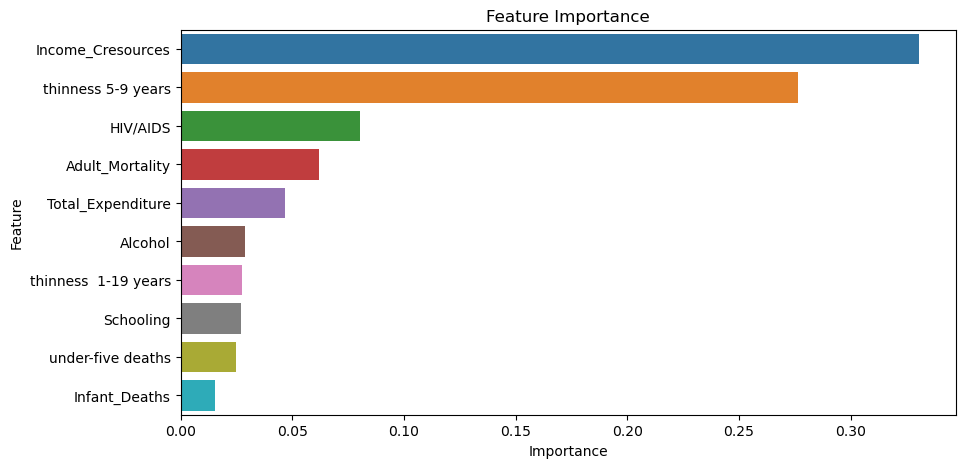

In [86]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

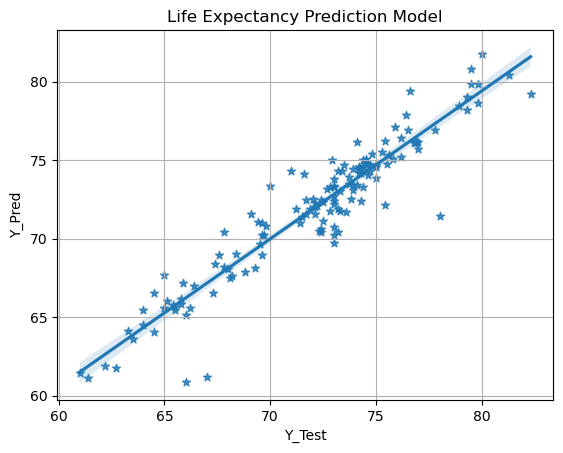

In [87]:
sns.regplot(x=y_test,y=y_pred,marker='*')
plt.xlabel('y_test')
plt.title('Life Expectancy Prediction Model')
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')
plt.grid()
plt.show()

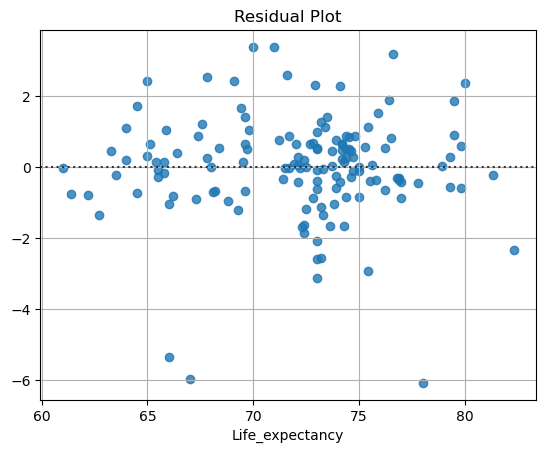

In [88]:
sns.residplot(x=y_test,y=y_pred)
plt.title('Residual Plot')
plt.grid()
plt.show()

### Saving Model as Pickle File

In [89]:
import pickle
filename = "LifeExpectancy_RegressionModel.pkl"

In [90]:
# Searialize Process
pickle.dump(data,open(filename,'wb'))

In [91]:
# UnSearialize Process
pickle.load(open('LifeExpectancy_RegressionModel.pkl','rb'))

,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
16,1,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
17,1,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,77.5
18,1,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,77.2
19,1,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,76.9
20,1,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,1,119.0,1,6.76,24.731423,94.0,0,6.1,1,94.0,8.17,94.0,0.1,962.312164,335824.0,1.6,1.5,0.770,15.7,76.4
2818,1,124.0,1,6.67,14.473059,94.0,0,59.5,1,94.0,8.23,94.0,0.1,79.697460,3339741.0,1.6,1.5,0.760,15.3,75.4
2822,1,121.0,1,5.11,160.840014,91.0,0,57.0,1,91.0,6.52,91.0,0.1,3622.522840,3325637.0,1.7,1.6,0.747,15.0,75.4
2823,1,124.0,1,5.86,27.468810,95.0,0,56.3,1,93.0,7.18,95.0,0.1,488.768855,3327773.0,1.7,1.7,0.746,14.7,75.4


# Thank you